# **Overview**

This project will employ Natural Language Processing techniques on Yelp reviews dataset, including sentiment analysis using Textblob and VADER to derive quantitative metrics on user sentiment and restaurant reviews in the city of Philadelphia in the state of Pennylvania. The recommendation engine is based on **sentiment analysis, user reviews and location of the user**. The sentiment scores will be combined with rating scores to create a super score that better reflects a user's overall experience and feelings towards a restaurant, which will be used in the **Collaborative Filtering** Recommendation System. The project will also use **Topic Modelling (LDA)** to classify text reviews based on dominant topics, which will be used in the **Content-Based** Recommendation System. Lastly, the project will use restaurant location data and K-Means Clustering Algorithm to build a **Location-Based** Recommendation System that clusters restaurants together based on their longitude and latitude points. This can be used for other cities and states as well for similar datasets.

##**Exploratory Data Analysis [EDA]**

In [ ]:
#Installing stylecloud
!pip install stylecloud
import nltk
nltk.download('stopwords')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.1/262.1 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.4/161.4 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259507 sha256=29d3258b0263d47fd651eee9a1b07ff9a2039289af1dec8a46bc1cac6df4a7a8
  Stored in directory: /root/.cache/pip/wheels/c5/8e/e8/d4fa02f02bc4eea452ff7722f5166d84b41d0c465beeed67cf
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116952 sha256=2c6fcb8a6ec19c5ee77dbdd832573214d43f32bf7b428c5d1f0cae0c87447f96
  Stored in directory: /root/.cache/pip

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install gensim==3.8.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 40.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gensim: filename=gensim-3.8.3-cp39-cp39-linux_x86_64.whl size=26527976 sha256=786cd0849f5a37cda8deb48fe5f4aaa478e47ea0b3a65c46e1e52e3da1de20aa
  Stored in directory: /root/.cache/pip/wheels/ca/5d/af/618594ec2f28608c1d6ee7d2b7e95a3e9b06551e3b80a491d6
Successfully built gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.1
    Uninstalling gensim-4.3.1:
      Successfully uninstalled gensim-4.3.1


In [ ]:
## Importing Basic Packages
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sys
pd.set_option('display.max_columns', 50)

import plotly 
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, plot, iplot


import sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import stylecloud


from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])


import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the final csv file for the Restaurant businesses

business_philadelphia = pd.read_csv("/content/drive/MyDrive/business_final.csv")
business_philadelphia.drop(['Unnamed: 0'], axis=1, inplace = True)
print(business_philadelphia.shape)
business_philadelphia.head(3)

(3529, 12)


,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code,key
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",39.955505,-75.155564,1,19107,MTSW4McQd7CbVtyjqoe9mw
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,Philadelphia,PA,4.0,245,"Sushi Bars, Restaurants, Japanese",39.953949,-75.143226,1,19106,MUTTqe8uqyMdBl186RmNeA
2,ROeacJQwBeh05Rqg7F6TCg,BAP,Philadelphia,PA,4.5,205,"Korean, Restaurants",39.943223,-75.162568,1,19147,ROeacJQwBeh05Rqg7F6TCg


In [ ]:
# Reading the final csv file for the user reviews

reviews_final_df = pd.read_csv("/content/drive/MyDrive/reviews_final_11.csv")
reviews_final_df.drop(['Unnamed: 0'], axis=1, inplace = True)
#Drop key column as it contains the same values in the user_id column
reviews_final_df.drop(['key'], axis=1, inplace = True) 
print(reviews_final_df.shape)
reviews_final_df.head(3)

(48449, 11)


,user_id,business_id,stars,useful,funny,cool,text,date,year,month,time
0,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2015,1,00:01:03
1,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5,0,0,0,My boyfriend and I tried this deli for the fir...,2018-08-23 21:39:38,2018,8,21:39:38
2,G0DHgkSsDozqUPWtlxVEMw,oBhJuukGRqPVvYBfTkhuZA,4,0,0,0,The only reason I didn't give this restaurant ...,2015-03-05 03:37:54,2015,3,03:37:54


In [ ]:
# Reading the final csv file for the number of users

users_final_df = pd.read_csv("/content/drive/MyDrive/users_final.csv")
users_final_df.drop(['Unnamed: 0'], axis=1, inplace = True)
print(users_final_df.shape)
users_final_df.head(3)

(6947, 22)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,NIhcRW6DWvk1JQhDhXwgOQ,Lia,2288,2005-12-30 13:47:19,12773,4199,7971,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","T1upaPMzuW7pNj74fO1rjA, CP28puvAEimt4ziuGTDaHA...",345,3.69,693,63,46,47,21,518,773,867,867,310,231
1,IpLRJY4CP3fXtlEd8Y4GFQ,Robyn,518,2009-04-11 14:35:46,1325,450,348,"2009,2010,2011","hdwDo7CLh9aN_9PckAos4Q, ci-mepWGgsgGT3sFI2mhMg...",35,2.95,32,4,2,7,1,35,17,20,20,20,6
2,qsHZ6_yT870pmm4Oxvw5Og,Debbie,39,2011-06-16 01:55:54,68,14,19,NaN,"z5owge5-GGcotX92-_XKDg, ow_8z-yarVPitiDq2YfjnQ...",5,3.85,0,1,0,0,0,0,1,0,0,0,0


###EDA on Business Data 

In [ ]:
# Geographical Overview of Restaurants in City of Philadelphia 

px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
fig = px.scatter_mapbox(business_philadelphia, lat="latitude", lon="longitude", color="stars", size='review_count',
                   size_max=15, zoom=10, width=1000, height=800)
fig.update_layout(mapbox_style="dark")
fig.show()

**Observation :** Based on the above, it is observed that more number of restaurants are situated in Rittenhouse square and center city (downtown) of Philadelphia

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Nightlife'),
  Text(1, 0, 'Bars'),
  Text(2, 0, 'Sandwiches'),
  Text(3, 0, 'Pizza'),
  Text(4, 0, 'American (Traditional)')])

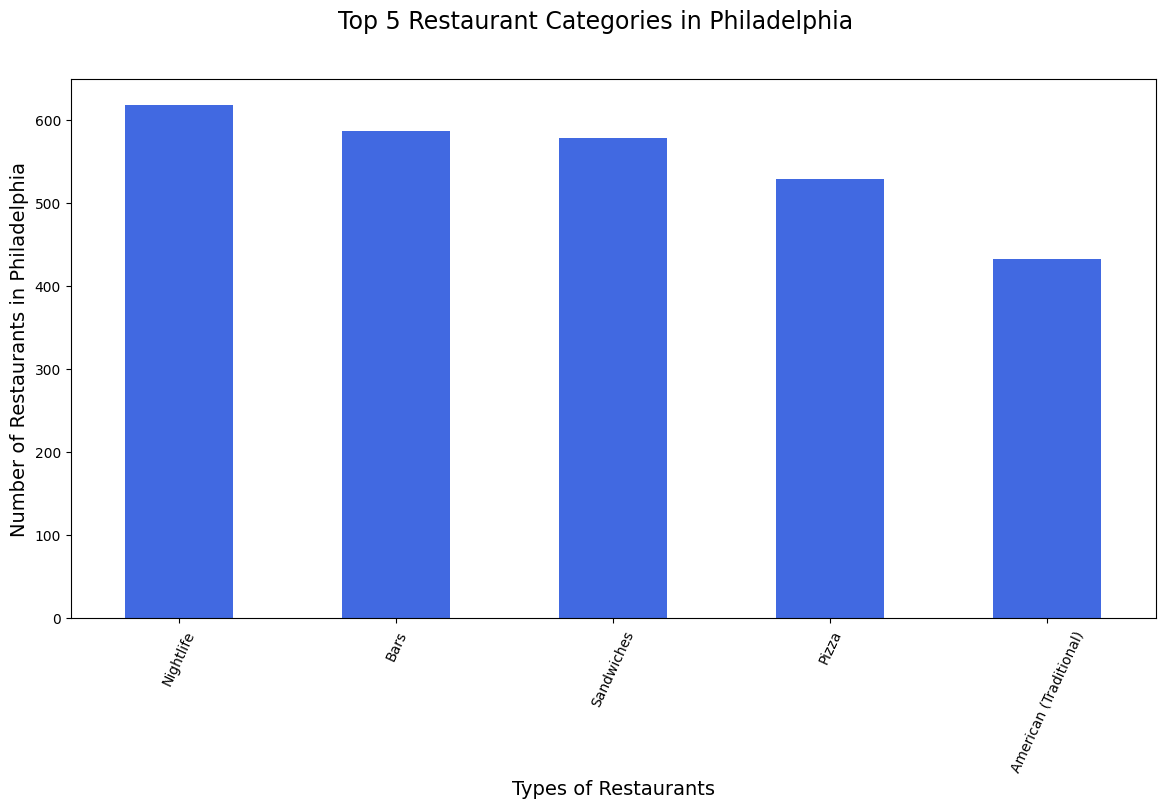

In [ ]:
 #Overview of Restaurant Categories(types and distribution)

categories_of_restaurants = business_philadelphia.assign(categories = business_philadelphia.categories.str.split(', ')).explode('categories')
categories_top25 = categories_of_restaurants.categories.value_counts().head(7)

fig, ax = plt.subplots(figsize=(14, 7))
fig.suptitle('Top 5 Restaurant Categories in Philadelphia', fontsize=17)

# Excluding Restaurant and Food Categories since they are the most generic

categories_top25[2:].plot(kind = 'bar', color = 'royalblue')

plt.ylabel('Number of Restaurants in Philadelphia', fontsize=14)
plt.xlabel('Types of Restaurants', fontsize=14)
plt.xticks(rotation=65)

In [ ]:
categories_top25

Restaurants               3525
Food                      1191
Nightlife                  618
Bars                       586
Sandwiches                 578
Pizza                      529
American (Traditional)     432
Name: categories, dtype: int64

Observation : As we observe from the above distribution plot, the most popular restaurant categories apart from Restaurants and Food are Nightlife, Bars, Sandwiches, Pizza and American(Traditional)

In [ ]:
# Amount of Categories of Restaurants which are Unique

len(set(categories_of_restaurants['categories'])) #362 Unique restaurant categories

362

In [ ]:
# Overview of Restaurants under the 'Nightlife' category in Philadelphia

nightlife_philadelphia = business_philadelphia[business_philadelphia['categories'].str.contains("Nightlife")]
print(nightlife_philadelphia.shape)
nightlife_philadelphia.head() # 618 Restaurants of the 'Nightlife' type

(618, 12)


,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code,key
14,7mpYTDb24SywNMRn3yeakQ,The Twisted Tail,Philadelphia,PA,4.0,604,"Event Planning & Services, Whiskey Bars, Ameri...",39.941877,-75.145199,1,19147,7mpYTDb24SywNMRn3yeakQ
23,MYoRNLb5chwjQe3c_k37Gg,Sean Thorntons Public House,Philadelphia,PA,3.5,6,"Food, Nightlife, Restaurants, Irish Pub, Bars,...",39.988107,-75.105553,1,19134,MYoRNLb5chwjQe3c_k37Gg
27,BxR5hjyBnJZrm_nnaCtGQw,The Lunar Inn,Philadelphia,PA,4.5,29,"Bars, Food, Restaurants, Beer, Wine & Spirits,...",39.982293,-75.103160,1,19134,BxR5hjyBnJZrm_nnaCtGQw
28,NQSnr4RPUScss607oxOaqw,Chase's Hop Shop,Philadelphia,PA,4.5,116,"Chicken Wings, Nightlife, Bars, Delis, Food, B...",40.060386,-75.084590,1,19111,NQSnr4RPUScss607oxOaqw
37,68ThEdiK0eWCEgGEmV9Tng,Southgate,Philadelphia,PA,4.0,323,"Breakfast & Brunch, American (Traditional), Ko...",39.945569,-75.171790,1,19146,68ThEdiK0eWCEgGEmV9Tng


In [ ]:
nightlife_philadelphia.name.value_counts() #602 Nightlife Restaurants which are Unique

Applebee's Grill + Bar    5
Chili's                   3
Loco Pez                  3
Miller's Ale House        2
Dave & Buster's           2
                         ..
Middle Child Clubhouse    1
City Tap House            1
Pier Bar                  1
2nd Story Brewing         1
Fergie's Pub              1
Name: name, Length: 602, dtype: int64

Text(0, 0.5, 'Number of Restaurants')

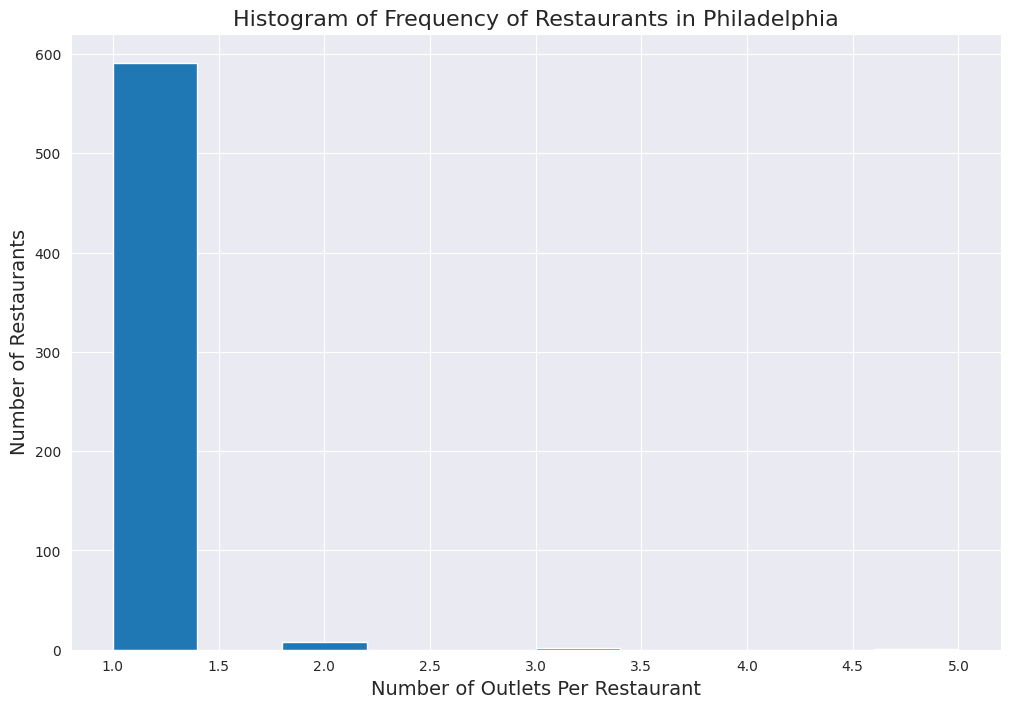

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
plt.hist(nightlife_philadelphia.name.value_counts(), bins=10)
plt.title('Histogram of Frequency of Restaurants in Philadelphia', fontsize=16)
plt.xlabel('Number of Outlets Per Restaurant', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)

**Observation:** Based on the above histogram, we observe that there are a number of outlets for some restuarants such as 'Applebee's Grill + Bar' and a few other restuarants. We will explore this further now. 

In [ ]:
applebees_philadelphia = nightlife_philadelphia[nightlife_philadelphia['name'].str.contains("Applebee's")]
applebees_philadelphia

,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code,key
207,QrIV69RPS4LTpIwPoL22_w,Applebee's Grill + Bar,Philadelphia,PA,2.5,55,"Bars, Fast Food, Sports Bars, Chicken Wings, R...",39.993173,-75.092621,1,19134,QrIV69RPS4LTpIwPoL22_w
1852,2hCIzMXhSbgObLS4al82rg,Applebee's Grill + Bar,Philadelphia,PA,2.5,61,"Nightlife, Restaurants, Steakhouses, Bars, Spo...",39.976856,-75.118897,1,19125,2hCIzMXhSbgObLS4al82rg
3352,fG6Wg3yrjY5Wm7UL00y3fw,Applebee's Grill + Bar,Philadelphia,PA,2.5,64,"American (Traditional), Burgers, Sandwiches, R...",40.076620,-75.033565,1,19115,fG6Wg3yrjY5Wm7UL00y3fw
3392,sDaBm5V1VQMOPfCm76turg,Applebee's Grill + Bar,Philadelphia,PA,2.5,65,"American (Traditional), Bars, Nightlife, Ameri...",40.063437,-75.238140,1,19128,sDaBm5V1VQMOPfCm76turg
3410,nFKATkd_j1iwFK9r6s0duQ,Applebee's Grill + Bar,Philadelphia,PA,2.0,71,"Furniture Reupholstery, Nightlife, Restaurants...",39.977529,-75.272689,1,19151,nFKATkd_j1iwFK9r6s0duQ


In [ ]:
# Geographical Overview of Applebee's Grill + Bar Outlets in Philadelphia
px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
fig = px.scatter_mapbox(applebees_philadelphia, lat="latitude", lon="longitude", color="stars", size='review_count',
                   size_max=15, zoom=10, width=1000, height=600)
fig.show()

**Observation:** We observe that Applebee's Grill + Bar have five branches across different locations and with different business ID's in Philadelphia


In [ ]:
#Now, based on the review count per business restaurant we sort the Restaurant Businesses in Philadelphia 

review_count_philadelphia = business_philadelphia.sort_values(by = 'review_count', ascending = False)
review_count_philadelphia

,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code,key
3337,ytynqOUb3hjKeJfRj5Tshw,Reading Terminal Market,Philadelphia,PA,4.5,5721,"Candy Stores, Shopping, Department Stores, Fas...",39.953341,-75.158855,1,19107,ytynqOUb3hjKeJfRj5Tshw
2684,PP3BBaVxZLcJU54uP_wL6Q,Pat's King of Steaks,Philadelphia,PA,3.0,4250,"Italian, American (Traditional), Sandwiches, F...",39.933201,-75.159266,1,19147,PP3BBaVxZLcJU54uP_wL6Q
1368,IkY2ticzHEn4QFn8hQLSWg,Geno's Steaks,Philadelphia,PA,2.5,3401,"Sandwiches, Cheesesteaks, Steakhouses, Restaur...",39.933837,-75.158814,1,19147,IkY2ticzHEn4QFn8hQLSWg
3073,9PZxjhTIU7OgPIzuGi89Ew,El Vez,Philadelphia,PA,4.0,3187,"Lounges, Bars, Nightlife, Breakfast & Brunch, ...",39.949702,-75.161770,1,19107,9PZxjhTIU7OgPIzuGi89Ew
769,ctHjyadbDQAtUFfkcAFEHw,Zahav,Philadelphia,PA,4.5,3065,"Nightlife, Bars, Food, Ethnic Food, Middle Eas...",39.946261,-75.145135,1,19106,ctHjyadbDQAtUFfkcAFEHw
...,...,...,...,...,...,...,...,...,...,...,...,...
1223,RGjzDIO6HlOU3Uo4IqVAww,A King's Cafe,Philadelphia,PA,3.0,5,"Chicken Wings, Restaurants, Seafood, Breakfast...",40.047863,-75.143980,1,19141,RGjzDIO6HlOU3Uo4IqVAww
2711,83Fw7PpQR9GY-IEokD7mmg,1201 Bar,Philadelphia,PA,3.5,5,"Dive Bars, American (Traditional), Nightlife, ...",39.938981,-75.189888,1,19146,83Fw7PpQR9GY-IEokD7mmg
1445,CcP-Xzb9HdZU63yW3YAVoA,Top Taste 2,Philadelphia,PA,4.0,5,"Restaurants, Caribbean",39.914148,-75.241544,1,19142,CcP-Xzb9HdZU63yW3YAVoA
2959,nTTHx6yjubwMsClRSPimuA,Goldie,Philadelphia,PA,4.5,5,"Falafel, Restaurants, Mediterranean",39.974636,-75.134198,1,19122,nTTHx6yjubwMsClRSPimuA


**Observation:** The restaurant with the highest reviews has a total of 5721 rweviews with the rating of 4.5 stars and the restaurant with the lowest reviews has 5 reviews with a rating of 2.0 stars.

In [ ]:
review_count_philadelphia.review_count.value_counts()

5       125
6       108
7        91
8        90
9        84
       ... 
489       1
204       1
494       1
495       1
5721      1
Name: review_count, Length: 609, dtype: int64

Text(0, 0.5, 'Number of Restaurants')

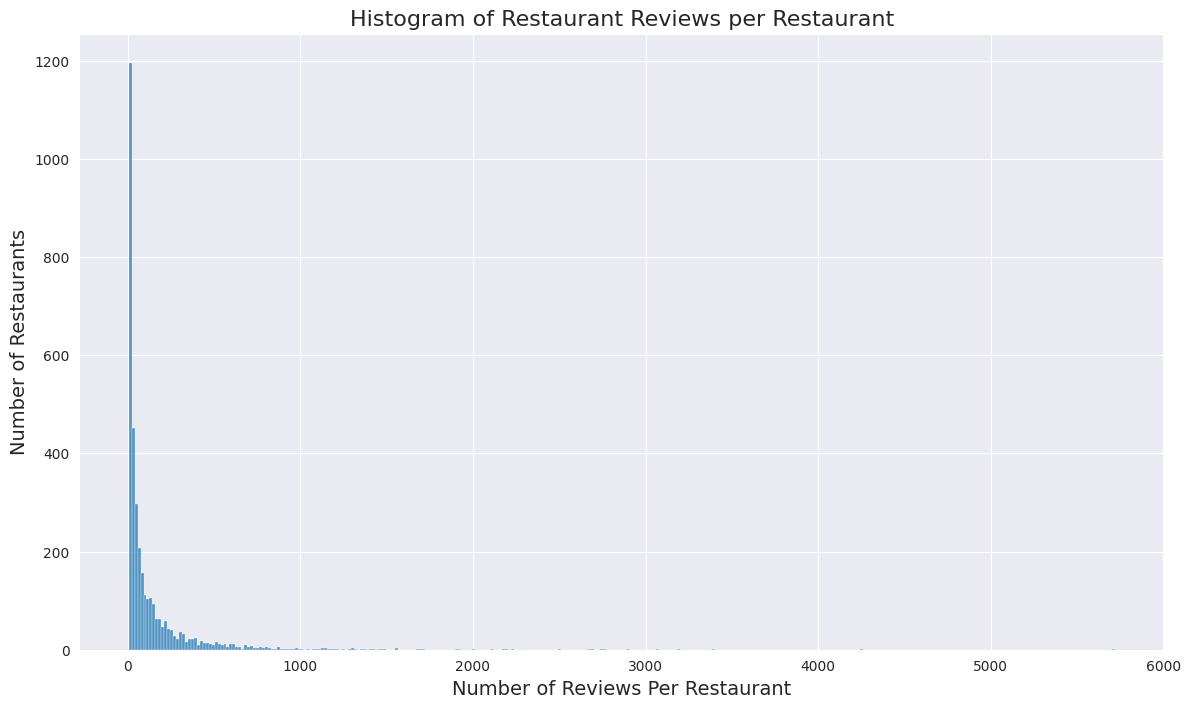

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.histplot(review_count_philadelphia['review_count'])
plt.title('Histogram of Restaurant Reviews per Restaurant', fontsize = 16)
plt.xlabel('Number of Reviews Per Restaurant', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)

**Observation:** We observe that the above histogram is skewed to the right meaning that a few restaurants have high reviews and most restaurants have lower number of reviews.

###**EDA on Reviews Data**

In [ ]:
# Reviews Data Overview

print(reviews_final_df.shape)
reviews_final_df.head(3)

(48449, 11)


,user_id,business_id,stars,useful,funny,cool,text,date,year,month,time
0,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2015,1,00:01:03
1,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5,0,0,0,My boyfriend and I tried this deli for the fir...,2018-08-23 21:39:38,2018,8,21:39:38
2,G0DHgkSsDozqUPWtlxVEMw,oBhJuukGRqPVvYBfTkhuZA,4,0,0,0,The only reason I didn't give this restaurant ...,2015-03-05 03:37:54,2015,3,03:37:54


In [ ]:
# Distribution of the Restaurant Ratings in Yelp from users
data_ratings = reviews_final_df['stars'].value_counts().sort_index(ascending=False)

trace = go.Bar(x = data_ratings.index,
               text = ['{:.1f} %'.format(val) for val in (data_ratings.values / reviews_final_df.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data_ratings.values
               )

# Creating layput and Distribution Plot

layout_ratings = dict(title = 'Distribution Of {} Restaurant Ratings from Yelp Users'.format(reviews_final_df.shape[0]),
              xaxis = dict(title = 'Rating / Stars'),
              yaxis = dict(title = 'Count'))

figure = go.Figure(data=[trace], layout=layout_ratings)
iplot(figure)

**Observation:** Based on the above Distribution Plot, the data is skewed to the left meaning that most restaurants have received ratings of 4.0 or 5.0 from users whereas lesser restaurants have received ratings of 3.0,2.0 and 1.0 respectively. 

##**Sentiment Analysis**

In [ ]:
reviews_final_df['text'].head()

0    Wow!  Yummy, different,  delicious.   Our favo...
1    My boyfriend and I tried this deli for the fir...
2    The only reason I didn't give this restaurant ...
3    My brother came to visit and we wanted to pick...
4    My go-to spot on a Saturday night! I was real ...
Name: text, dtype: object

**Note:** To better comprehend the information in our collection of reviews, we will conduct sentiment analysis on the textual content of the reviews. This will allow us to grasp the emotional experiences of users when dining at various restaurants.

Using the distribution plot of reviews from the previous section, we will categorize negative reviews as those that were given a rating of 1 or 2 stars, and classify positive reviews as those that were given a rating of 5 stars. Reviews with a rating of 3 or 4 stars will be labeled as neutral reviews.

###**Negative Reviews**

In [ ]:
# Filtering for reviews which are negative(one or two stars)

reviews_with_one_star = reviews_final_df[reviews_final_df['stars'] == 1.0]
reviews_with_two_star = reviews_final_df[reviews_final_df['stars'] == 2.0]
negative_reviews = [reviews_with_one_star, reviews_with_two_star]
negative_reviews = pd.concat(negative_reviews)
print(negative_reviews.shape)
negative_reviews.sample(6) #8317 rows of reviews labeled as negative reviews

(8317, 11)


,user_id,business_id,stars,useful,funny,cool,text,date,year,month,time
21482,g9KQ5wpo94_4duwHTV-VUQ,JUlsvVAvZvGHWFfkKm0nlg,1,0,0,0,"Way overpriced. Bland food. We ordered a ""Miss...",2017-08-07 03:08:35,2017,8,03:08:35
31239,1_Ypiz0PM1UNRE8cvU503g,FnEkr6LzjuGsg93Z7fkl7Q,1,0,0,0,I preface this review with this was a my 3rd v...,2021-12-18 01:15:21,2021,12,01:15:21
24998,Huz3u-D76tz6LRLvYbvbkQ,JomDoQafikclSVVCPkWjnA,2,0,0,0,Went here for breakfast and the food was not g...,2019-08-10 23:48:08,2019,8,23:48:08
6018,lUh7jUppfI8924BQk3csfg,B6qHZCAs7Nka-1zdjCzAIQ,1,0,0,0,I came from out of town to Philadelphia for a ...,2018-07-31 16:37:34,2018,7,16:37:34
11817,VlfYvru05K3Wb_5ZxdYozA,wCluBbW9nzS7MEMFltMwJw,1,4,0,0,Never again will I patronize this restaurant! ...,2018-10-07 15:53:24,2018,10,15:53:24
13333,sIH5HbEwhbxt-4waYoDUBw,Bmh7d4yVxpgLPQ8KLcy_4Q,2,0,0,0,I ordered a chicken cheesesteak wrap and I don...,2017-02-08 02:26:00,2017,2,02:26:00


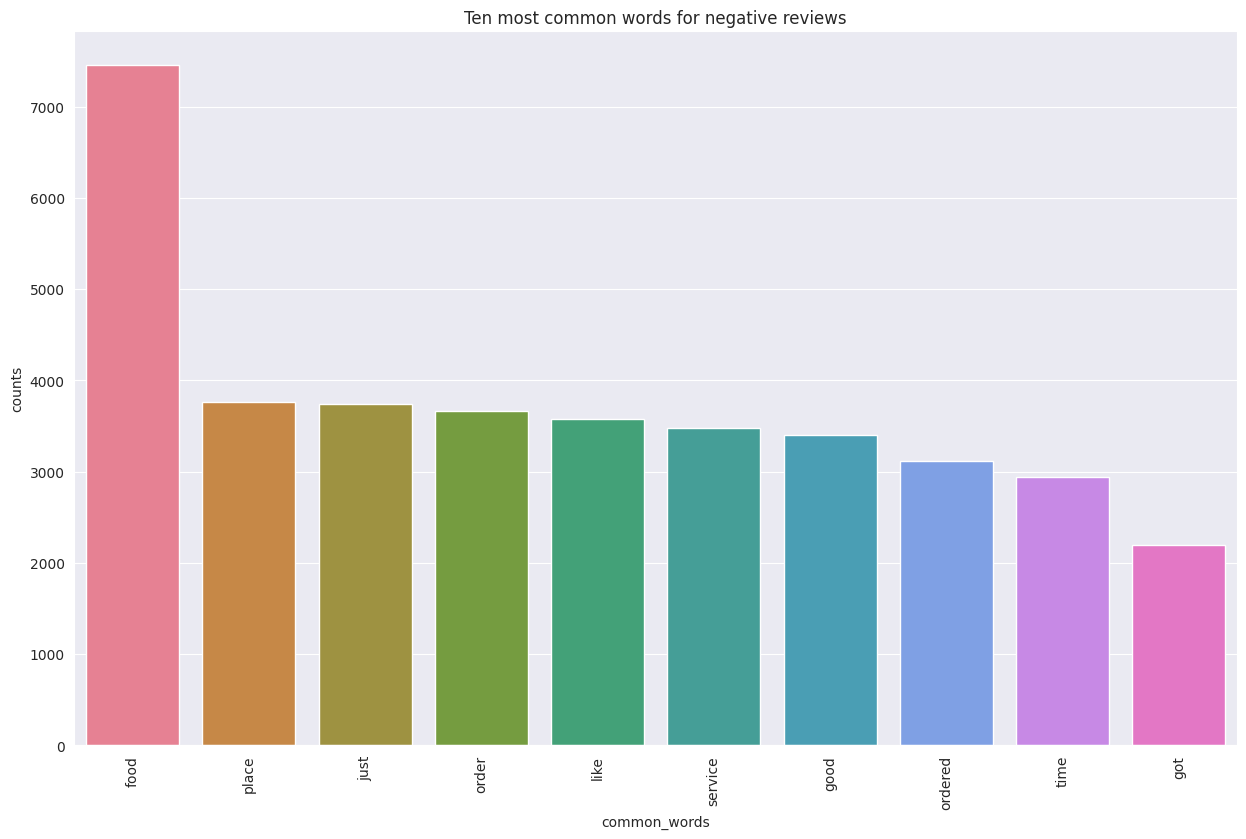

In [ ]:
## Sentiment Analysis for Negative Reviews

def plot_10_most_common_words(data_count, vectorizer_count):
    common_words = vectorizer_count.get_feature_names_out()
    total_count = np.zeros(len(common_words))
    for t in data_count:
        total_count+=t.toarray()[0]
    
    dict_count = (zip(common_words, total_count))
    dict_count = sorted(dict_count, key=lambda x:x[1], reverse=True)[0:10]
    common_words = [w[0] for w in dict_count]
    counts = [w[1] for w in dict_count]
    x_pos = np.arange(len(common_words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='Ten most common words for negative reviews')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x=x_pos, y=counts, palette='husl')
    plt.xticks(x_pos, common_words, rotation=90) 
    plt.xlabel('common_words')
    plt.ylabel('counts')
    plt.show()
    

vectorizer_count = CountVectorizer(stop_words='english')
data_count = vectorizer_count.fit_transform(negative_reviews['text'])

# Visualising the ten most common words
plot_10_most_common_words(data_count, vectorizer_count)

**Note:** A few words such as 'restaurant', 'food', 'place', 'like' are freqent words in negative reviews. However, when used on their own, they are not very indicative about the sentiment of the negative reviews and hence, we will plot our word cloud after removing such words.

In [ ]:
#Removing words such as "a, and,the"
from nltk.corpus import stopwords

# Get a list of stop words from the NLTK corpus
stop_words = stopwords.words('english')

# Create a CountVectorizer object with the specified parameters
cvec = CountVectorizer(min_df=2, stop_words=stop_words, max_features=1000)

# Fit and transform the negative reviews using the CountVectorizer object
negative_words = pd.DataFrame(cvec.fit_transform(negative_reviews['text']).todense(),
                              columns=cvec.get_feature_names_out())

# Get the top 150 most common words in negative reviews
negative_top = negative_words.sum(axis=0).sort_values(ascending=False).head(150)


In [ ]:
negative_pd = pd.DataFrame(data=negative_top)
negative_top = negative_words[negative_pd.index]
negative_top.drop(columns=['food','like', 'restaurant', 'place', 'good'], inplace = True)
negative_top.head()

<ipython-input-26-97077c02a627>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,order,service,ordered,one,would,us,time,back,get,even,got,never,came,go,chicken,said,minutes,asked,really,told,table,also,could,first,people,...,philly,anything,next,waiter,finally,phone,30,customers,quality,gave,dish,always,maybe,new,dry,everything,someone,looked,let,bread,fried,15,wrong,eating,water
0,0,0,0,0,0,1,0,2,1,0,0,2,2,0,1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,2,0,1,1,4,1,0,1,1,0,0,1,1,0,2,1,1,1,3,2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


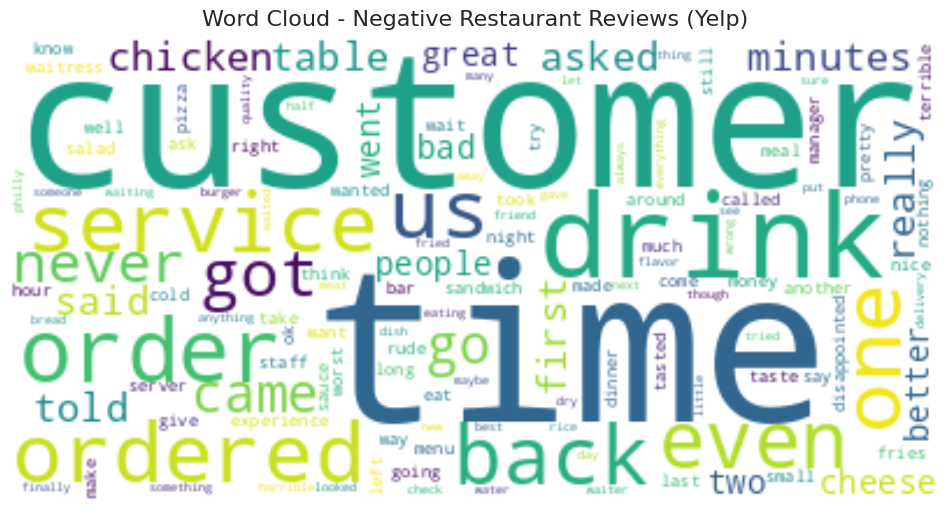

In [ ]:
#Word Cloud Generation

word_cloud = WordCloud(background_color="white").generate(' '.join(negative_top))
plt.figure(figsize = (12,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title('Word Cloud - Negative Restaurant Reviews (Yelp)', fontsize=16, y=1.01)
plt.axis("off");

In [ ]:
negative_reviews['counter'] = 1
negative_reviews.head()

,user_id,business_id,stars,useful,funny,cool,text,date,year,month,time,counter
26,tgZ0r69ap3_-sNBgLPZsPw,C_EtrXTygRX5RTUOKtO6Dg,1,0,0,0,It's a good thing I've had a few weeks to cool...,2016-08-25 18:34:30,2016,8,18:34:30,1
38,oQUyojSOb6rdMnusw0M5lg,-ATiAtTikuGuqvaW2O6tNA,1,0,0,0,Really disappointed. I've been to the Marathon...,2016-01-17 05:29:01,2016,1,05:29:01,1
56,fwpHDRkxm7ZNxUtl3ExHmw,HTqXI5S2XcSlh_ylx9sE6g,1,0,0,0,I had the carrot cake.... Very disappointed ta...,2015-08-06 21:31:14,2015,8,21:31:14,1
61,4yecY-NxOtnjABr5U5lstw,GUMVStVaJfWmCIpQA4TtHg,1,0,0,0,Zero stars for the Chicken Teriyaki Lunch Bent...,2017-03-03 20:04:29,2017,3,20:04:29,1
80,scdTjUdj76BNg78b88yXrA,TFnGJlA5l_HDdzGDkNTdTA,1,0,0,0,This place is VERY crowded and not in a good w...,2018-10-04 01:15:01,2018,10,01:15:01,1


In [ ]:
# Sorting Restaurants in order based on the quantity of reviews they have received.

negative_reviews.groupby('business_id')['counter'].sum().sort_values(ascending = False)

business_id
JUlsvVAvZvGHWFfkKm0nlg    178
eaDZlSuVS0EY67Ke6pRP6Q    149
eMiN8nm70jjKg8izikVWDA     98
aUoMG97DMJG4nmwhT6z1zA     93
DsKzHnkLKnxZTVsFpts4oA     91
                         ... 
63iaDyR3vXu9J3wx8XipSA      1
Vq-oKF_DsX2QbRz-m5t27A      1
WkNJ3FnK5WVW3thVUe-WSw      1
rlKk3ynwimKAa70zhpAntA      1
QyWxTsVvvqSEpU1KNblRbQ      1
Name: counter, Length: 568, dtype: int64

In [ ]:
# Restaurant with the most number of negative reviews

bad_restaurant = business_philadelphia[business_philadelphia['business_id '] == 'JUlsvVAvZvGHWFfkKm0nlg']
bad_restaurant

,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code,key
253,JUlsvVAvZvGHWFfkKm0nlg,El Camino Real,Philadelphia,PA,3.5,1014,"Mexican, Tex-Mex, Restaurants, Barbeque",39.9673,-75.140398,1,19123,JUlsvVAvZvGHWFfkKm0nlg


In [ ]:
# Filtering Reviews from the Restaurant with the most number of negative reviews(Bad Restaurant)

bad_restaurant_reviews = negative_reviews[negative_reviews['business_id'] == 'JUlsvVAvZvGHWFfkKm0nlg']
bad_restaurant_reviews

,user_id,business_id,stars,useful,funny,cool,text,date,year,month,time,counter
97,uhMdAVSyEDQvAj4nZE4OVA,JUlsvVAvZvGHWFfkKm0nlg,1,1,0,0,We live in the neighborhood and have eaten her...,2015-06-08 23:06:46,2015,6,23:06:46,1
148,7sRHqsFob3Fts0n5ot67mg,JUlsvVAvZvGHWFfkKm0nlg,1,1,0,0,I wish I could go back and time and not eat he...,2016-07-04 01:43:43,2016,7,01:43:43,1
225,vzfOEeFCGRSYznvAvvQgKQ,JUlsvVAvZvGHWFfkKm0nlg,1,1,2,0,We ordered delivery because I'm sick at home. ...,2018-04-04 00:58:55,2018,4,00:58:55,1
532,cZnTDZ__FvT-Fy6MyWU93w,JUlsvVAvZvGHWFfkKm0nlg,1,0,0,0,Ordered food came super fast! But when we orde...,2015-07-04 06:33:07,2015,7,06:33:07,1
555,4vsT0zEhFkbJ6u78GDAWUw,JUlsvVAvZvGHWFfkKm0nlg,1,0,1,0,I went to El Camino on a Sunday afternoon for ...,2017-02-19 20:31:11,2017,2,20:31:11,1
...,...,...,...,...,...,...,...,...,...,...,...,...
25901,Fyumh_D_qCOyi5NVIzxtPA,JUlsvVAvZvGHWFfkKm0nlg,2,0,0,0,I'm rating this 2 stars for the absolutely pit...,2018-09-18 02:53:38,2018,9,02:53:38,1
26166,jW7lk-uoBb6prh3crsVFVg,JUlsvVAvZvGHWFfkKm0nlg,2,0,0,0,Pretty lame. Sat outside for over 20 minutes. ...,2019-06-10 00:56:18,2019,6,00:56:18,1
29814,xWo5LSE7Tv3gNp-rGE9qZw,JUlsvVAvZvGHWFfkKm0nlg,2,0,0,0,Maybe the hostess was having a bad day but her...,2021-06-04 15:58:47,2021,6,15:58:47,1
31496,Qza0EVW1J_k0u8BIqMRbHQ,JUlsvVAvZvGHWFfkKm0nlg,2,4,0,0,Let me preface this review by saying that this...,2015-01-01 21:13:10,2015,1,21:13:10,1


In [ ]:
# Removing words such as "and, a, the"
# Get a list of stop words from the NLTK corpus
stop_words = stopwords.words('english')


# Create a CountVectorizer object with the specified parameters
cvec = CountVectorizer(min_df=2, stop_words=stop_words, max_features=1000)

# Fit and transform the negative reviews using the CountVectorizer object
negative_words = pd.DataFrame(cvec.fit_transform(bad_restaurant_reviews['text']).todense(),
                              columns=cvec.get_feature_names_out())
#Converting the output received by the transformed filtered cvec to Dataframe

negative_top = negative_words.sum(axis=0).sort_values(ascending=False).head(150)
negative_pd = pd.DataFrame(data=negative_top)
negative_top = negative_words[negative_pd.index]
negative_top.drop(columns=['food','like', 'restaurant', 'place', 'good', 'better', 'great','one','even', 'us', 'got', 'go', 'came'], inplace = True)
negative_top.head()





<ipython-input-32-dad4347321a9>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,service,ordered,would,time,back,get,order,minutes,manager,wait,waitress,tacos,said,told,table,really,outside,could,drinks,asked,never,server,two,also,bar,...,small,empty,worst,water,away,disappointed,staff,15,want,put,used,rude,nothing,says,guacamole,seating,maybe,margarita,let,enough,super,walked,however,quesadilla,bill
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0
1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,2,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2,2,0,0,2,0,0,0,0,1,0,0,1,0,1,0,0,0,2,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
import os

# Specify the directory path
directory_path = '/content/drive/MyDrive/Data_Part2'

# Create the directory path if it does not already exist
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

column_list = list(negative_top)
negative_words = negative_top[column_list].sum(axis=0)
negative_words = negative_words.to_frame(name = 'sum').reset_index()
negative_words.set_index('index',inplace = True)
negative_words.to_csv("/content/drive/MyDrive/Data_Part2/negative_words.csv")

In [ ]:
negative_words.shape

(137, 1)

In [ ]:
negative_thumbs_down = stylecloud.gen_stylecloud(file_path="/content/drive/MyDrive/Data_Part2/negative_words.csv", 
                                        icon_name = "fas fa-thumbs-down",
                                        size = 550,
                                        palette="colorbrewer.sequential.RdPu_3", 
                                        background_color="white",
                                        output_name = '/content/drive/MyDrive/Data_Part2/Negative_Reviews.png')

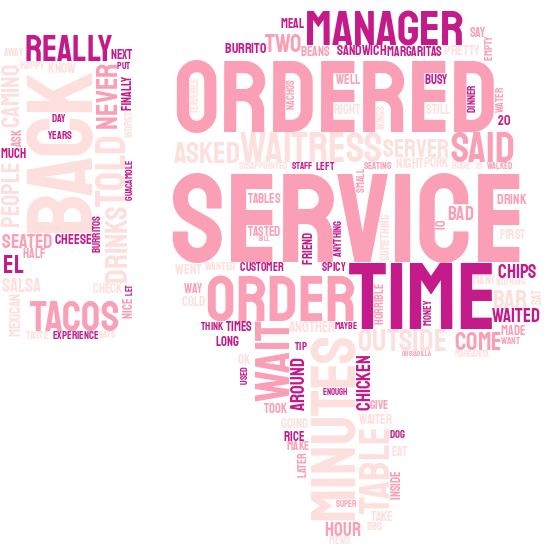

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Data_Part2/Negative_Reviews.png')

### **Positive Reviews**

In [ ]:
# Filtering for positive reviews which are five star reviews

reviews_positive = reviews_final_df[reviews_final_df['stars'] == 5.0]
print(reviews_positive.shape)
reviews_positive.sample(5) #22804 rows of reviews data labeled as positive reviews

(22804, 11)


,user_id,business_id,stars,useful,funny,cool,text,date,year,month,time
30100,76hKJn3WxYAeXPivpxrbXw,GFBuCSY2jMRzg-E7Zhg1SA,5,0,0,0,Everything is made from scratch and you can ta...,2019-10-20 22:48:51,2019,10,22:48:51
35126,NBfOmK7w-3nwWiVjyH0qbw,cGX-1IUwXOjkUqZbkKYcjw,5,0,0,0,The food here is amazing and the service even ...,2016-11-22 17:32:54,2016,11,17:32:54
36840,SX6qFbh9XY-5BS18uqTFmA,S8ZFYEgMejpChID8tzKo9A,5,0,0,0,Amada is hands down one of my favorite restaur...,2016-02-13 15:20:53,2016,2,15:20:53
4332,-EzggOfDkyVo-1KdOIzslQ,AWJyivVwe3t9BO-k8D0ynQ,5,1,0,1,"OMG. This is paradise. Kind, generous, creativ...",2017-10-07 17:34:48,2017,10,17:34:48
27855,K81qFWzscubCrdLO7NxDJQ,68ThEdiK0eWCEgGEmV9Tng,5,0,0,0,Super psyched about this place. It is has supe...,2015-09-18 00:50:31,2015,9,00:50:31


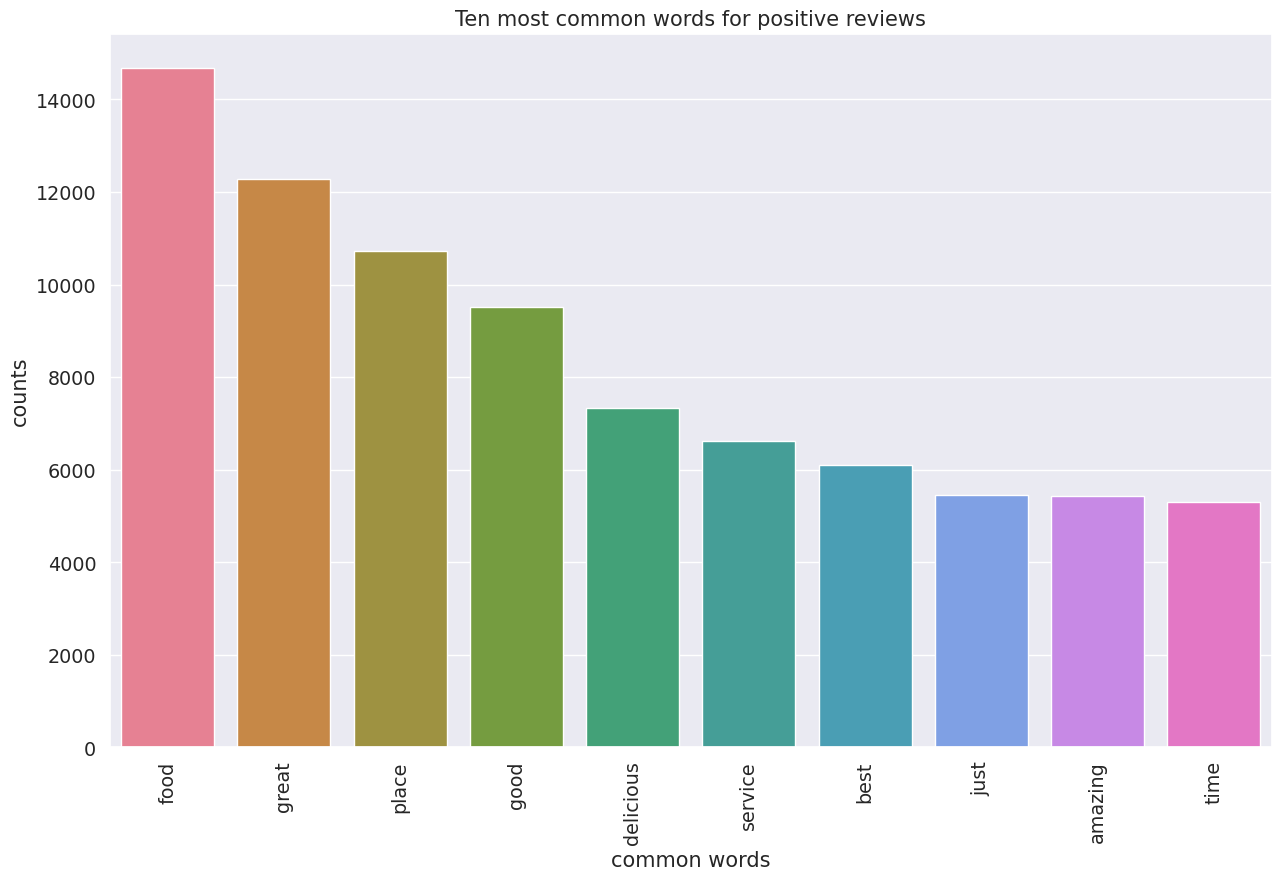

In [ ]:
#Sentiment Analysis for Positive Reviews
def plot_ten_most_common_words_positive_reviews(count_data, count_vectorizer):
    common_positive_words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(common_positive_words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(common_positive_words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    common_positive_words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(common_positive_words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='Ten most common words for positive reviews')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x=x_pos, y=counts, palette='husl')
    plt.xticks(x_pos, common_positive_words, rotation=90) 
    plt.xlabel('common words')
    plt.ylabel('counts')
    plt.show()


count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(reviews_positive['text'])

# Visualising the ten most common words
plot_ten_most_common_words_positive_reviews(count_data, count_vectorizer)

In [ ]:
# Removing words such as "and, a, the"
# Get a list of stop words from the NLTK corpus
stop_words = stopwords.words('english')


# Create a CountVectorizer object with the specified parameters
cvec_positive = CountVectorizer(min_df=2, stop_words=stop_words, max_features=1000)

# Fit and transform the negative reviews using the CountVectorizer object
positive_words = pd.DataFrame(cvec_positive.fit_transform(reviews_positive['text']).todense(),
                       columns=cvec_positive.get_feature_names_out())

#Converting the output received by the transformed filtered cvec to Dataframe


positive_top = positive_words.sum(axis = 0).sort_values(ascending = False).head(100)
positive_pd = pd.DataFrame(data=positive_top)
positive_top = positive_words[positive_pd.index]
positive_top.drop(columns=['food','like', 'restaurant', 'place', 'really'], inplace = True)
positive_top.head()





<ipython-input-39-c5f178337fdd>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,great,good,delicious,service,best,back,also,one,amazing,time,go,get,chicken,definitely,love,philly,well,menu,got,would,always,ordered,try,friendly,nice,...,fried,atmosphere,drinks,small,two,loved,fries,sandwich,tried,happy,say,new,area,dish,brunch,next,sure,dishes,take,want,table,around,absolutely,better,pork
0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,3,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1


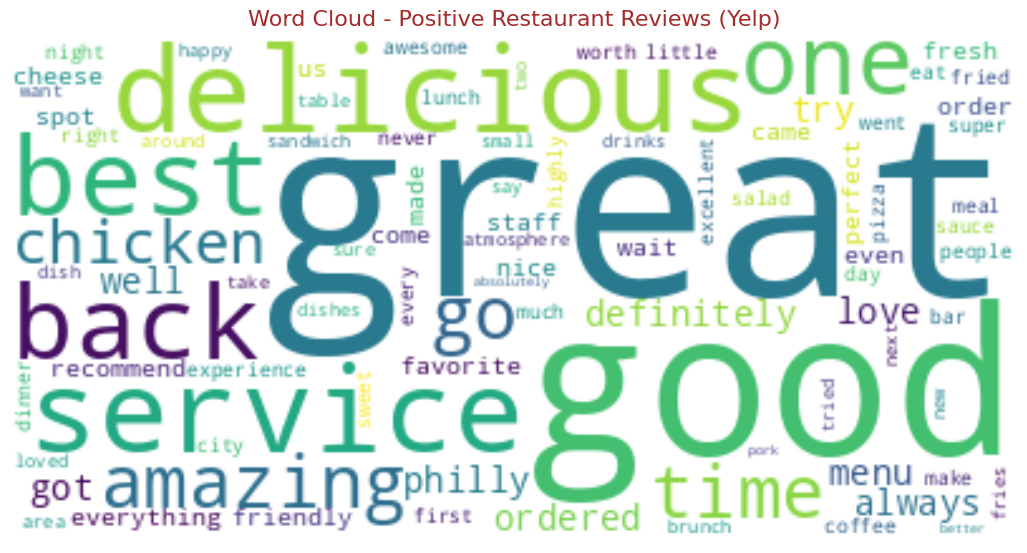

In [ ]:
#Word Cloud Generation 

high_wordcloud = WordCloud(background_color="white").generate(' '.join(positive_top))
plt.figure(figsize = (13,11))
plt.imshow(high_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Positive Restaurant Reviews (Yelp)', fontsize=16, y=1.01 , color = 'brown')
plt.axis("off");

In [ ]:
reviews_positive['counter'] = 1
reviews_positive.head()


<ipython-input-41-ead598735d0f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_id,business_id,stars,useful,funny,cool,text,date,year,month,time,counter
0,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2015,1,00:01:03,1
1,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5,0,0,0,My boyfriend and I tried this deli for the fir...,2018-08-23 21:39:38,2018,8,21:39:38,1
3,mNITUu6B2wUKBOa4NmUHJg,NQSnr4RPUScss607oxOaqw,5,0,0,0,My brother came to visit and we wanted to pick...,2016-05-19 06:10:14,2016,5,06:10:14,1
5,Z5j9Xw_G0c7M2b1-iS67wg,HTqXI5S2XcSlh_ylx9sE6g,5,1,1,1,I've only had the cannolis here but they are a...,2018-03-23 14:35:33,2018,3,14:35:33,1
11,AGyh5jnM0zrIElY7aZQafQ,5ezrDoezdUlJpUa5Jg6dUQ,5,0,0,0,Went here with a friend after having an incred...,2017-06-06 21:42:37,2017,6,21:42:37,1


In [ ]:
# We are sorting the restaurants based on the most number of positive reviews
reviews_positive.groupby('business_id')['counter'].sum().sort_values(ascending = False)

business_id
vUrTGX_7HxqeoQ_6QCVz6g    798
j-qtdD55OLfSqfsWuQTDJg    401
Sv1MEZP-mMfp8SmE0hwYEA    340
dChRGpit9fM_kZK5pafNyA    322
Dv6RfXLYe1atjgz3Xf4GGw    301
                         ... 
s55Hw6gHhQzZctinFhPu-g      1
Zc5KhfYODgRQWBi8JA7nbQ      1
rz_an69uzlVtRzkRSMqrsw      1
a93-oNkJsUWOCiHu5O9xLA      1
zxY4DgtXsVHihSUpsmwamg      1
Name: counter, Length: 594, dtype: int64

In [ ]:
# The restaurant with the most number of positive reviews

greatest_restaurant = business_philadelphia[business_philadelphia['business_id '] == 'vUrTGX_7HxqeoQ_6QCVz6g']
greatest_restaurant

,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code,key
163,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,Philadelphia,PA,4.5,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",39.973687,-75.133956,1,19125,vUrTGX_7HxqeoQ_6QCVz6g


In [ ]:
# Some of the reviews given to the best restaurant with the most positive reviews
greatest_restaurant_reviews = reviews_positive[reviews_positive['business_id'] == 'vUrTGX_7HxqeoQ_6QCVz6g']
greatest_restaurant_reviews

,user_id,business_id,stars,useful,funny,cool,text,date,year,month,time,counter
146,UizCd11Qoo74BKARrZp7HA,vUrTGX_7HxqeoQ_6QCVz6g,5,0,0,1,We are visiting in Philadelphia from Californi...,2018-05-28 21:27:38,2018,5,21:27:38,1
173,49aswoS-d09tyWNJimzZ5A,vUrTGX_7HxqeoQ_6QCVz6g,5,1,0,0,Delicious food ! I personally loved it !!!\n\n...,2018-02-01 19:28:41,2018,2,19:28:41,1
353,5s0nTuLRm3ue4Qfrj9PHkQ,vUrTGX_7HxqeoQ_6QCVz6g,5,0,0,0,Instagram worthy and Claire is an amazing serv...,2018-05-28 23:07:50,2018,5,23:07:50,1
484,HzEmzPSHcvCBUzf2d8cNRw,vUrTGX_7HxqeoQ_6QCVz6g,5,1,0,1,Great food ! Great customer service ! Amazing ...,2018-04-27 21:15:12,2018,4,21:15:12,1
485,M_ac9MaKb10AJ0vueqEyBw,vUrTGX_7HxqeoQ_6QCVz6g,5,0,0,0,This is definitely the best breakfast place in...,2018-03-04 17:05:22,2018,3,17:05:22,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32500,e0nKpqUjBMHCTL54dOF6uw,vUrTGX_7HxqeoQ_6QCVz6g,5,1,0,0,Suraya is a powerhouse restaurant with the mix...,2021-07-14 00:54:58,2021,7,00:54:58,1
32507,FkAWG1q1x7xt4tO0RjLl3g,vUrTGX_7HxqeoQ_6QCVz6g,5,0,0,0,The tasting menu at Suraya has been on my list...,2021-02-16 23:44:44,2021,2,23:44:44,1
32518,W80BuAjANlrmkW8jenJtCg,vUrTGX_7HxqeoQ_6QCVz6g,5,0,0,0,This is my absolute favorite restaurant in Phi...,2021-08-23 21:19:34,2021,8,21:19:34,1
32567,3bAwRhXMXfI8rYZiUzbWEQ,vUrTGX_7HxqeoQ_6QCVz6g,5,0,0,0,A great experience! Very nice place. Tables ...,2021-12-16 18:21:30,2021,12,18:21:30,1


In [ ]:
# Removing words such as "and, a, the"

# Get a list of stop words from the NLTK corpus
stop_words = stopwords.words('english')


# Create a CountVectorizer object with the specified parameters
cvec3 = CountVectorizer(min_df=2, stop_words=stop_words, max_features=1000)


# Fit and transform the negative reviews using the CountVectorizer object
positive_words = pd.DataFrame(cvec3.fit_transform(greatest_restaurant_reviews['text']).todense(),
                       columns=cvec3.get_feature_names_out())

#Converting the output received by the transformed filtered cvec to Dataframe


positive_top = positive_words.sum(axis = 0).sort_values(ascending = False).head(100)
positive_pd = pd.DataFrame(data=positive_top)
positive_top = positive_words[positive_pd.index]
positive_top.drop(columns=['food','like', 'restaurant', 'place', 'really'], inplace = True)
positive_top.head()












<ipython-input-45-3202570c309a>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,suraya,delicious,great,amazing,back,service,good,menu,also,hummus,one,everything,get,ordered,best,definitely,lamb,well,time,beautiful,brunch,dinner,would,pita,go,...,first,tasting,flavor,decor,highly,night,coffee,say,bread,open,fatteh,wonderful,worth,rose,flavors,sure,bar,warm,incredible,yogurt,eat,fries,ambiance,served,top
0,0,2,1,1,2,1,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,1,0,1,1,0,0,1,0,1,1,1,1,0,0,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import os
# Specify the directory path
directory_path = '/content/drive/MyDrive/Data_Part2'

# Create the directory path if it does not already exist
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

list_columns = list(positive_top)
positive_words = positive_top[list_columns].sum(axis=0)
positive_words = positive_words.to_frame(name = 'sum').reset_index()
positive_words.set_index('index',inplace = True)
positive_words.to_csv("/content/drive/MyDrive/Data_Part2/positive_words.csv")






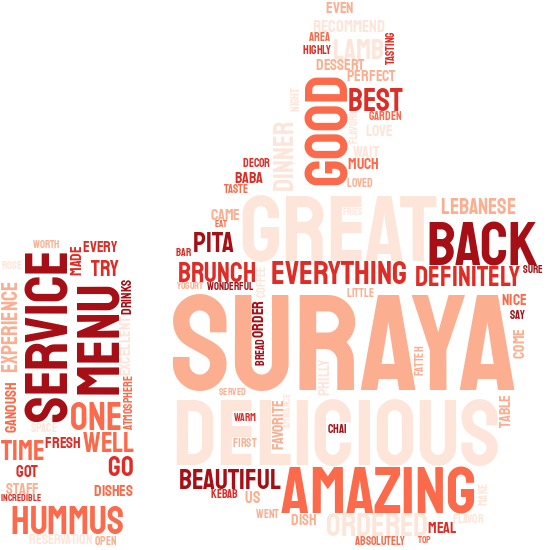

In [ ]:
thumbs_up_positive = stylecloud.gen_stylecloud(file_path="/content/drive/MyDrive/Data_Part2/positive_words.csv", 
                                        icon_name = "fas fa-thumbs-up",
                                        size = 550,
                                        palette="colorbrewer.sequential.Reds_5", 
                                        background_color="white",
                                        output_name = '/content/drive/MyDrive/Data_Part2/Positive_Reviews.png')

#Displaying a thumbs up image for positive reviews

Image(filename='/content/drive/MyDrive/Data_Part2/Positive_Reviews.png')

###**Making New Feature Columns**

In [ ]:
reviews_final_df.head(5)

,user_id,business_id,stars,useful,funny,cool,text,date,year,month,time
0,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2015,1,00:01:03
1,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5,0,0,0,My boyfriend and I tried this deli for the fir...,2018-08-23 21:39:38,2018,8,21:39:38
2,G0DHgkSsDozqUPWtlxVEMw,oBhJuukGRqPVvYBfTkhuZA,4,0,0,0,The only reason I didn't give this restaurant ...,2015-03-05 03:37:54,2015,3,03:37:54
3,mNITUu6B2wUKBOa4NmUHJg,NQSnr4RPUScss607oxOaqw,5,0,0,0,My brother came to visit and we wanted to pick...,2016-05-19 06:10:14,2016,5,06:10:14
4,aWlojpSpzEICTza3RgGJgg,SIoCIxjn4jLt2O-4DajWJw,4,0,0,0,My go-to spot on a Saturday night! I was real ...,2015-11-18 17:47:29,2015,11,17:47:29


In [ ]:
 #Obtaining the word count for reviews in order to create new feature columns

reviews_final_df['word_count'] = reviews_final_df['text'].apply(lambda x: len(str(x).split(" ")))

# Calculating the character count for reviews

reviews_final_df['character_count'] = reviews_final_df['text'].str.len()

# Calculating the average length for reviews 

def avg_word_length(review):
  words = review.split()
  return (sum(len(word) for word in words) / len(words))

reviews_final_df['avg_word_length'] = reviews_final_df['text'].apply(lambda x: avg_word_length(x))

# Calculating the amount of stop words for reviews

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
reviews_final_df['count_of_stopwords'] = reviews_final_df['text'].apply(lambda x: len([x for x in x.split() if x in stopwords]))

reviews_final_df.head()

,user_id,business_id,stars,useful,funny,cool,text,date,year,month,time,word_count,character_count,avg_word_length,count_of_stopwords
0,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2015,1,00:01:03,48,243,4.900000,12
1,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5,0,0,0,My boyfriend and I tried this deli for the fir...,2018-08-23 21:39:38,2018,8,21:39:38,73,393,4.397260,25
2,G0DHgkSsDozqUPWtlxVEMw,oBhJuukGRqPVvYBfTkhuZA,4,0,0,0,The only reason I didn't give this restaurant ...,2015-03-05 03:37:54,2015,3,03:37:54,422,2343,4.547393,177
3,mNITUu6B2wUKBOa4NmUHJg,NQSnr4RPUScss607oxOaqw,5,0,0,0,My brother came to visit and we wanted to pick...,2016-05-19 06:10:14,2016,5,06:10:14,63,330,4.253968,27
4,aWlojpSpzEICTza3RgGJgg,SIoCIxjn4jLt2O-4DajWJw,4,0,0,0,My go-to spot on a Saturday night! I was real ...,2015-11-18 17:47:29,2015,11,17:47:29,72,396,4.438356,26


Text(0, 0.5, 'Reviews Percentage')

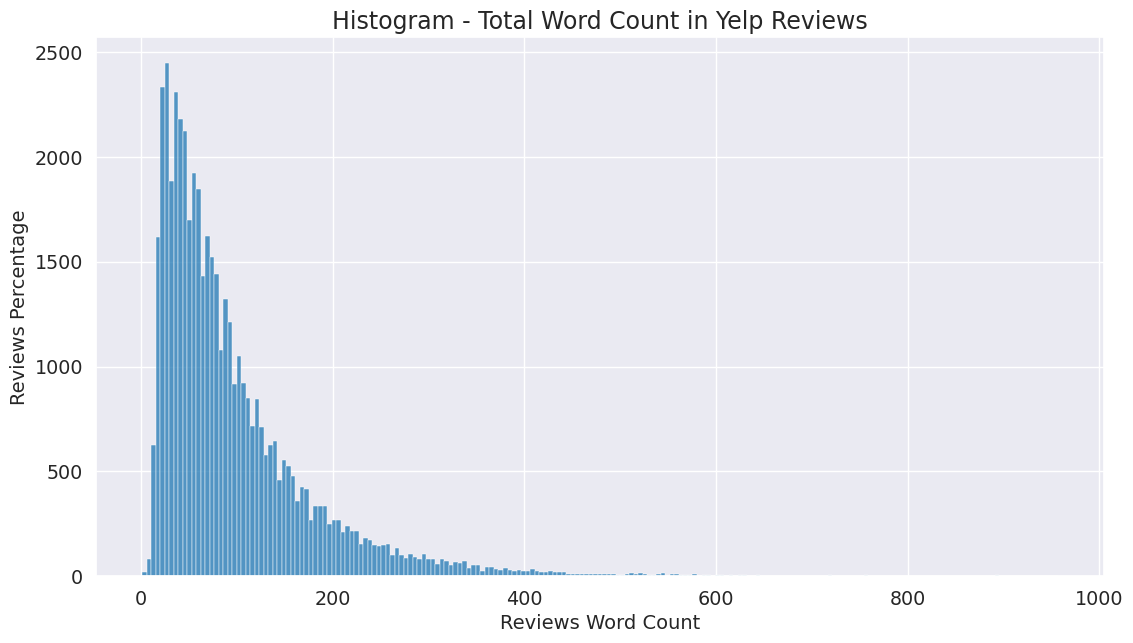

In [ ]:
# Plotting a histogram of the word count in Yelp Reviews 

sns.set_style("darkgrid")
plt.figure(figsize=(13,7))
sns.histplot(reviews_final_df['word_count'])
plt.title('Histogram - Total Word Count in Yelp Reviews', fontsize = 17)
plt.xlabel('Reviews Word Count', fontsize=14)
plt.ylabel('Reviews Percentage', fontsize=14)

Text(0, 0.5, 'Reviews Percentage')

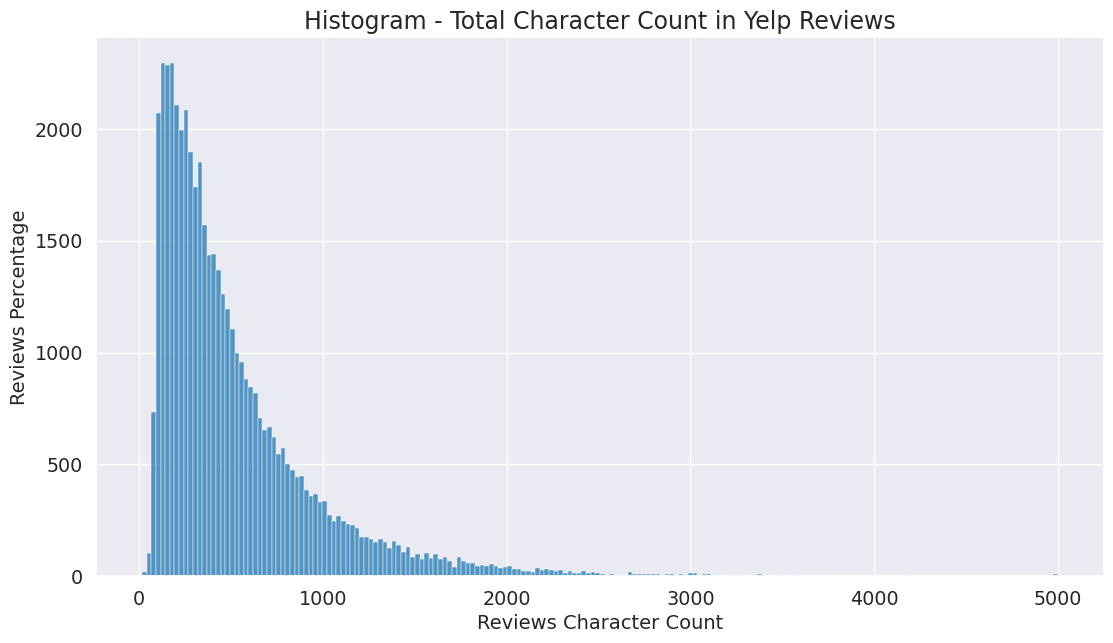

In [ ]:
# Plotting a histogram of the character count in Yelp Reviews 

sns.set_style("darkgrid")
plt.figure(figsize=(13,7))
sns.histplot(reviews_final_df['character_count'])
plt.title('Histogram - Total Character Count in Yelp Reviews', fontsize = 17)
plt.xlabel('Reviews Character Count', fontsize=14)
plt.ylabel('Reviews Percentage', fontsize=14)

Text(0, 0.5, 'Restaurants Percentage')

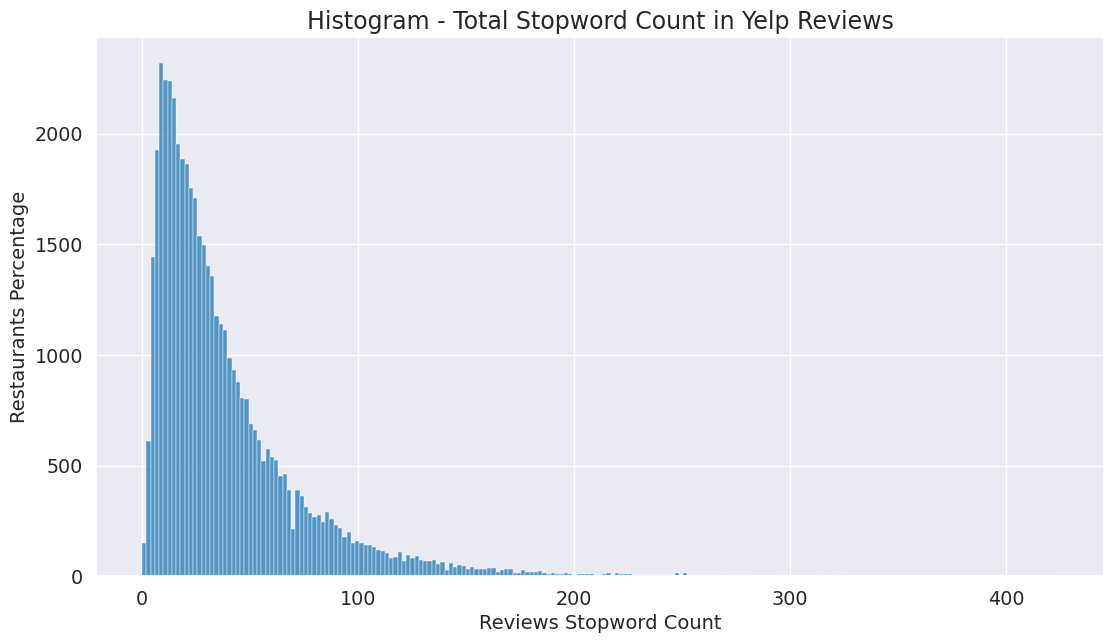

In [ ]:
# Plotting a histogram of the stopword count in Yelp Reviews 

sns.set_style("darkgrid")
plt.figure(figsize=(13,7))
sns.histplot(reviews_final_df['count_of_stopwords'])
plt.title('Histogram - Total Stopword Count in Yelp Reviews', fontsize = 17)
plt.xlabel('Reviews Stopword Count', fontsize=14)
plt.ylabel('Restaurants Percentage', fontsize=14)

**Observation:** According to these distributions, it is apparent that Word count, Character count, and Stopword count are skewed towards the right. This means that the majority of Yelp reviews are relatively brief, and as the length of the reviews increases, we observe fewer of them in our dataset.

In [ ]:
# Average Length of Words in Reviews across various Ratings or Stars

reviews_final_df.groupby('stars')['word_count'].mean()

stars
1    114.822066
2    122.223176
3    119.341846
4    104.411218
5     83.234389
Name: word_count, dtype: float64

In [ ]:
wordcount_stars = reviews_final_df.groupby('stars')['word_count'].mean()
wordcount_stars = wordcount_stars.to_frame(name = 'sum').reset_index()
wordcount_stars

,stars,sum
0,1,114.822066
1,2,122.223176
2,3,119.341846
3,4,104.411218
4,5,83.234389


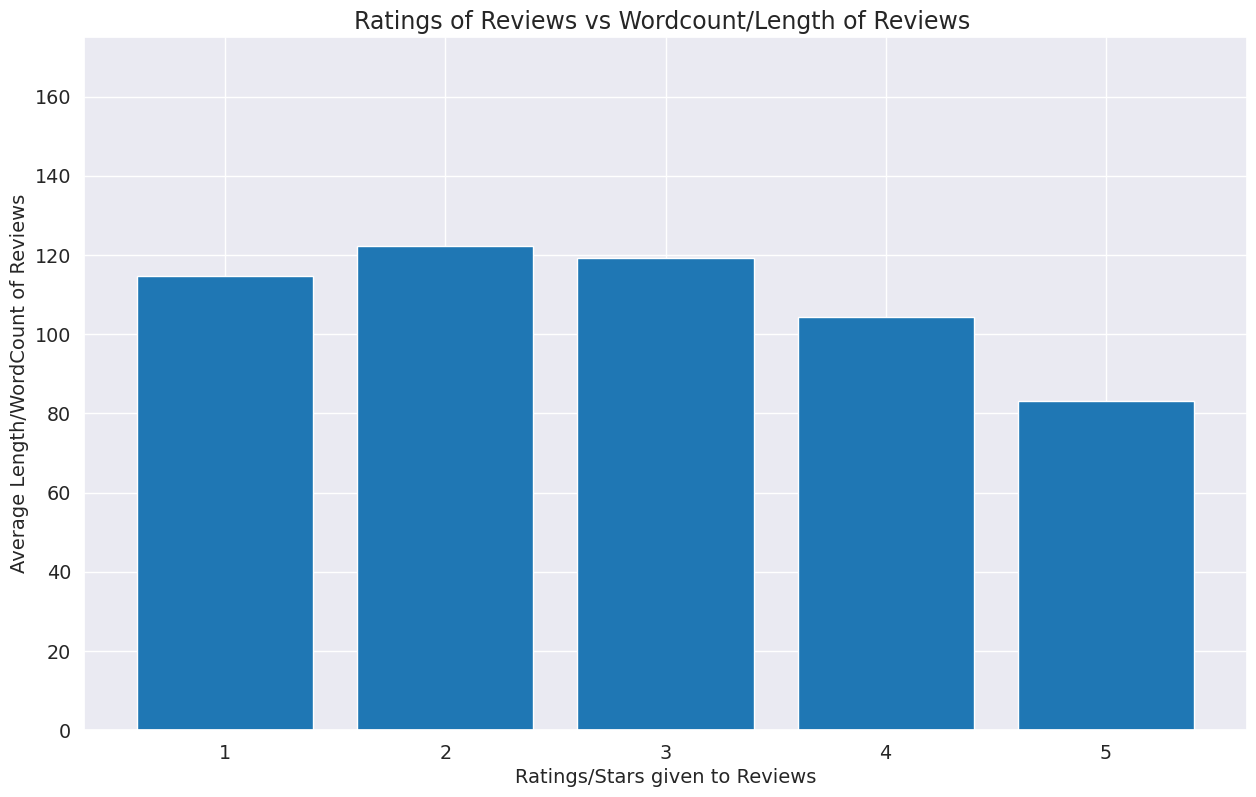

In [ ]:
# Plotting the Distribution of Avg Length/Wordcount of Reviews vs Ratings of Reviews

sns.set_style("darkgrid")
plt.figure(figsize=(15,9))
plt.bar(wordcount_stars['stars'],wordcount_stars['sum'])
plt.title('Ratings of Reviews vs Wordcount/Length of Reviews ', fontsize = 17)
plt.xlabel('Ratings/Stars given to Reviews', fontsize=14)
plt.ylabel('Average Length/WordCount of Reviews', fontsize=14)
plt.ylim((0,175))
plt.show()

**Observation:** According to the distribution chart, negative reviews with 1 and 2-star ratings are generally longer in terms of word count compared to reviews with 4 or 5-star ratings, which are more positive in nature.

##**Text Processing**

In [ ]:

from textblob import Word
import nltk

nltk.download('all')

# Splitting up words in reviews, removing punctuation, stopwords and lemmatizing cleaned text

reviews_final_df['cleaned_text'] = reviews_final_df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
reviews_final_df['cleaned_text'] = reviews_final_df['cleaned_text'].str.replace('[^\w\s]', '')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
reviews_final_df['cleaned_text'] = reviews_final_df['cleaned_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
reviews_final_df['cleaned_text'] = reviews_final_df['cleaned_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
reviews_final_df.head()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

,user_id,business_id,stars,useful,funny,cool,text,date,year,month,time,word_count,character_count,avg_word_length,count_of_stopwords,cleaned_text
0,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2015,1,00:01:03,48,243,4.900000,12,wow yummy different delicious favorite lamb cu...
1,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5,0,0,0,My boyfriend and I tried this deli for the fir...,2018-08-23 21:39:38,2018,8,21:39:38,73,393,4.397260,25,boyfriend tried deli first time today turkey a...
2,G0DHgkSsDozqUPWtlxVEMw,oBhJuukGRqPVvYBfTkhuZA,4,0,0,0,The only reason I didn't give this restaurant ...,2015-03-05 03:37:54,2015,3,03:37:54,422,2343,4.547393,177,reason didnt give restaurant 5 star rating one...
3,mNITUu6B2wUKBOa4NmUHJg,NQSnr4RPUScss607oxOaqw,5,0,0,0,My brother came to visit and we wanted to pick...,2016-05-19 06:10:14,2016,5,06:10:14,63,330,4.253968,27,brother came visit wanted pick six pack good b...
4,aWlojpSpzEICTza3RgGJgg,SIoCIxjn4jLt2O-4DajWJw,4,0,0,0,My go-to spot on a Saturday night! I was real ...,2015-11-18 17:47:29,2015,11,17:47:29,72,396,4.438356,26,goto spot saturday night real bummed lucy clos...


##**Using Textblob for CLassification of Text**

**Sentiment analysis** refers to the procedure of identifying the writer's or user's sentiment, which may be positive, negative, or neutral. The textblob's sentiment function provides two parameters: polarity and subjectivity. 
**Polarity** is a floating-point value ranging from -1 to 1, where a score of 1 indicates a positive statement and -1 denotes a negative statement. 
**Subjective** statements usually involve personal opinions, emotions, or judgments, while objective statements involve factual information. Subjectivity is also a floating-point value ranging from 0 to 1.

In [ ]:
# Now we calculate the subjectivity and polarity score

from textblob import TextBlob

reviews_final_df['polarity'] = reviews_final_df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment[0])
reviews_final_df['subjectivity'] = reviews_final_df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment[1])
reviews_final_df.head(5)

,user_id,business_id,stars,useful,funny,cool,text,date,year,month,time,word_count,character_count,avg_word_length,count_of_stopwords,cleaned_text,polarity,subjectivity
0,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2015,1,00:01:03,48,243,4.900000,12,wow yummy different delicious favorite lamb cu...,0.315152,0.733838
1,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5,0,0,0,My boyfriend and I tried this deli for the fir...,2018-08-23 21:39:38,2018,8,21:39:38,73,393,4.397260,25,boyfriend tried deli first time today turkey a...,0.138889,0.492593
2,G0DHgkSsDozqUPWtlxVEMw,oBhJuukGRqPVvYBfTkhuZA,4,0,0,0,The only reason I didn't give this restaurant ...,2015-03-05 03:37:54,2015,3,03:37:54,422,2343,4.547393,177,reason didnt give restaurant 5 star rating one...,0.093537,0.476332
3,mNITUu6B2wUKBOa4NmUHJg,NQSnr4RPUScss607oxOaqw,5,0,0,0,My brother came to visit and we wanted to pick...,2016-05-19 06:10:14,2016,5,06:10:14,63,330,4.253968,27,brother came visit wanted pick six pack good b...,0.626667,0.723333
4,aWlojpSpzEICTza3RgGJgg,SIoCIxjn4jLt2O-4DajWJw,4,0,0,0,My go-to spot on a Saturday night! I was real ...,2015-11-18 17:47:29,2015,11,17:47:29,72,396,4.438356,26,goto spot saturday night real bummed lucy clos...,0.000833,0.588333


##**Vader Sentiment Analysis**

**VADER(Valence Aware Dictionary and Sentiment Reasoner)** is a tool for sentiment analysis that focuses on detecting emotions in social media posts. It uses a set of lexical features, such as words, that are categorized as either positive or negative in terms of their meaning. VADER is effective in analyzing a variety of texts, including social media posts, movie reviews, and product reviews. One of the reasons for its success is its ability to provide a **compound score**, which not only indicates the positivity or negativity of a sentiment but also measures its intensity on a scale from -1 (very negative) to +1 (very positive). The compound score is computed by summing the valence scores of each word in the lexicon, adjusting for certain rules, and then normalizing the score.






In [ ]:
#Calculating the scores of the Vader Sentiment Analysis 

!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

sentiment_vader = reviews_final_df['text'].apply(lambda x: analyzer.polarity_scores(x))
reviews_final_df = pd.concat([reviews_final_df,sentiment_vader.apply(pd.Series)],1)
reviews_final_df.sample(5)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 14.4 MB/s eta 0:00:00


<ipython-input-58-1e7f8623aad3>:9: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



,user_id,business_id,stars,useful,funny,cool,text,date,year,month,time,word_count,character_count,avg_word_length,count_of_stopwords,cleaned_text,polarity,subjectivity,neg,neu,pos,compound
41029,LsEMXiELa5r88OFvVhTEqQ,fEqiXG_B-fn__w0aeF3nBQ,5,0,0,0,Great place for a date. Menu was very creative...,2017-06-20 03:18:58,2017,6,03:18:58,32,161,4.062500,14,great place date menu creative course tiny ful...,0.412500,0.700000,0.00,0.764,0.236,0.8379
29733,_9SgHCf7l44xPx79iLnIPQ,0JoB3ThhI-DS78-1Ks1EUQ,4,2,0,1,Hibachi 2 Go is my guilty pleasure. It's quick...,2018-11-03 01:50:08,2018,11,01:50:08,58,301,4.206897,20,hibachi 2 go guilty pleasure quick cheap hit s...,-0.017725,0.707937,0.03,0.860,0.110,0.6114
34126,1ZNoD0moOKQJWW6vEOMBJA,j6usntbtSzFyuwx4n2mn1g,5,0,0,0,What a great neighborhood gem near the end of ...,2015-12-06 11:47:01,2015,12,11:47:01,90,515,4.666667,37,great neighborhood gem near end south street w...,0.425000,0.729167,0.00,0.731,0.269,0.9831
47384,nZBR4CdkZUgrV29WSBPepQ,Ldch7Nc5gaZrhcIRd7mcjw,4,0,0,0,Terrific sushi place and convenient location. ...,2018-04-26 18:50:27,2018,4,18:50:27,39,240,5.315789,12,terrific sushi place convenient location atmos...,0.316667,0.625000,0.00,0.667,0.333,0.9477
43281,st0BO3TE5ZlwcJngc2l3sA,j-qtdD55OLfSqfsWuQTDJg,4,0,0,0,One of my Philadelphia favorites.\n\nI love th...,2015-07-12 21:25:32,2015,7,21:25:32,80,407,4.465753,26,one philadelphia favorite love ambiance parc i...,0.295833,0.514583,0.00,0.770,0.230,0.9567


Text(0, 0.5, 'Restaurant Percentage')

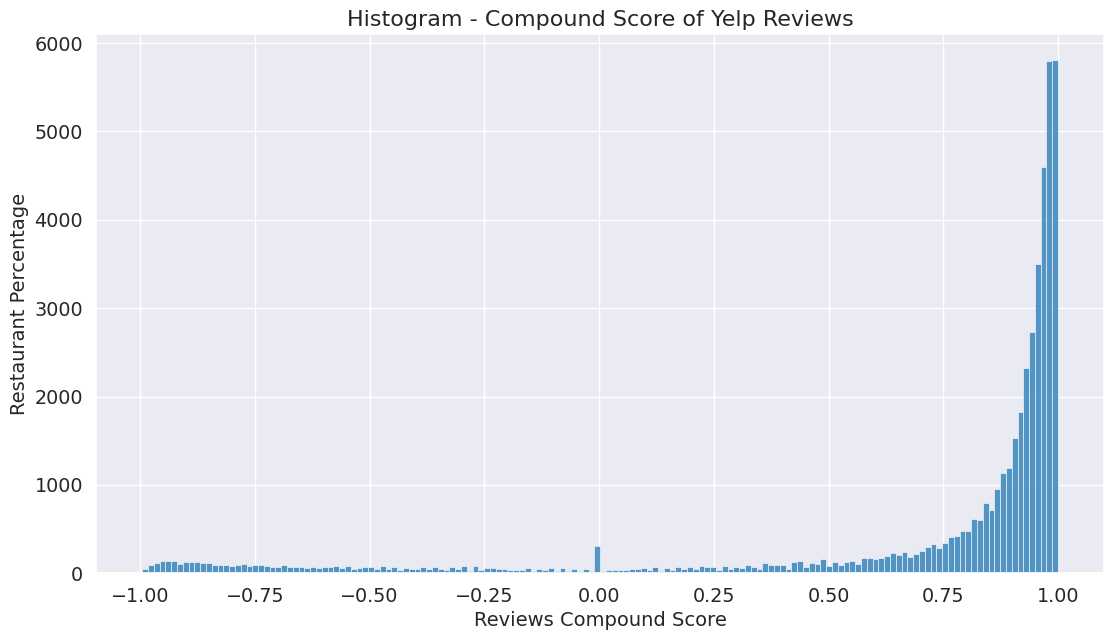

In [ ]:
# A Histogram Chart showing the distribution of the overall rating scores of Yelp reviews.

sns.set_style("darkgrid")
plt.figure(figsize=(13,7))
sns.histplot(reviews_final_df['compound'])
plt.title('Histogram - Compound Score of Yelp Reviews', fontsize = 16)
plt.xlabel('Reviews Compound Score', fontsize=14)
plt.ylabel('Restaurant Percentage', fontsize=14)

**Observation:** The distribution is not symmetrical and is skewed towards the left side, suggesting that the majority of reviews have a compound score close to 1.0, indicating that they are predominantly positive, according to the Vader Sentiment Analysis. It is noteworthy that the polarity score distribution of the reviews has a more normal distribution, ranging from -1 (extremely negative) to +1 (extremely positive), when compared to the compound score distribution.

Text(0, 0.5, 'Restaurants Percentage')

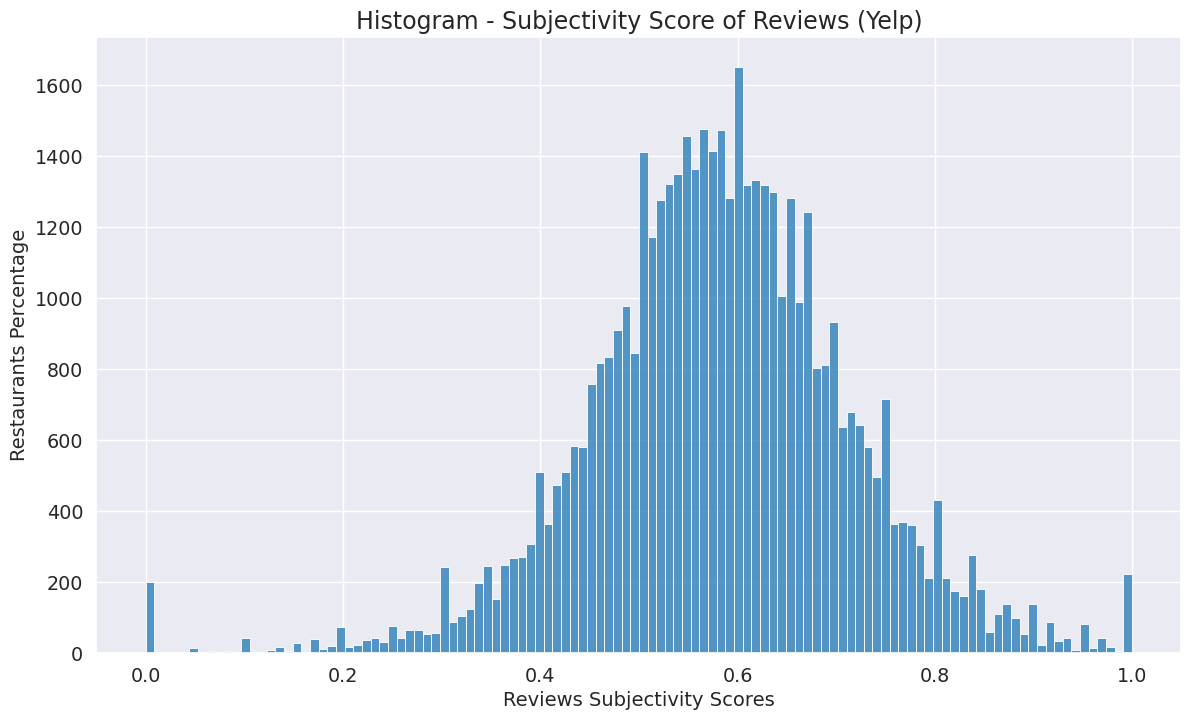

In [ ]:
# A Histogram Chart showing the distribution of the subjectivity scores of Yelp reviews.

sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.histplot(reviews_final_df['subjectivity'])
plt.title('Histogram - Subjectivity Score of Reviews (Yelp)', fontsize = 17)
plt.xlabel('Reviews Subjectivity Scores', fontsize=14)
plt.ylabel('Restaurants Percentage', fontsize=14)



**Observation:** This histogram exhibits a distribution that is closer to a normal distribution, with the majority of reviews tending to be positive (>0) rather than negative (<0) on average.

Text(0, 0.5, 'Restaurants Percentage')

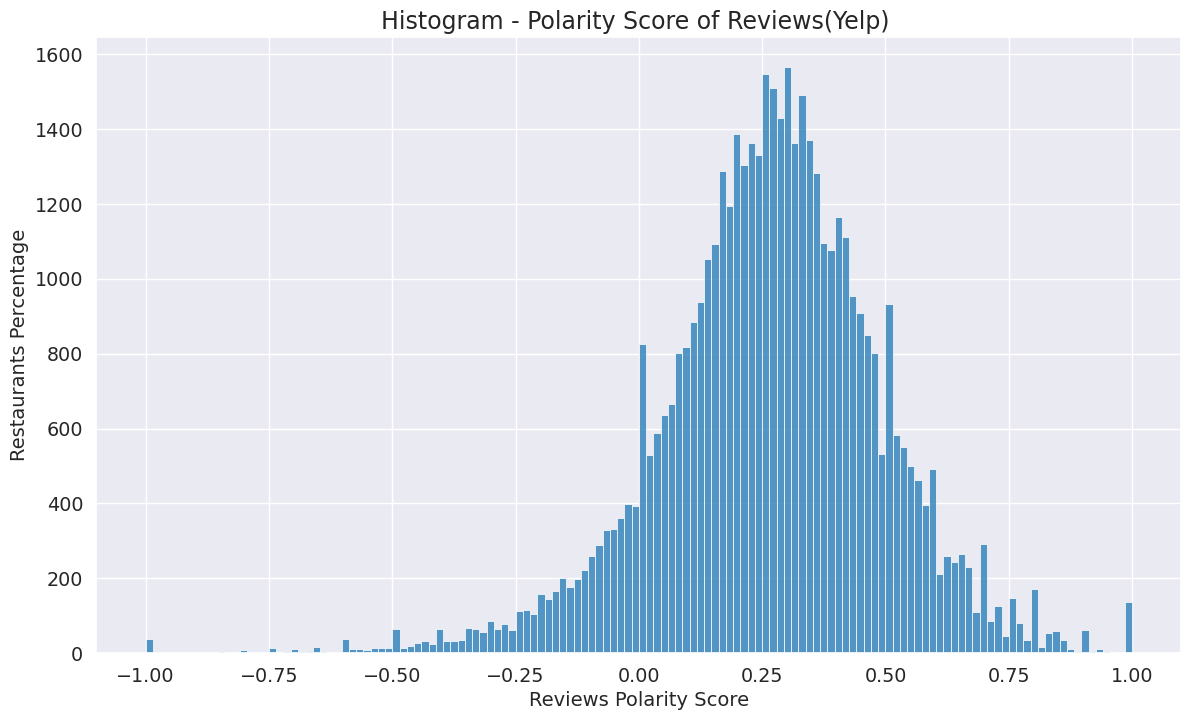

In [ ]:
# A Histogram Chart showing the distribution of the polarity scores of Yelp reviews.

sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.histplot(reviews_final_df['polarity'])
plt.title('Histogram - Polarity Score of Reviews(Yelp) ', fontsize = 17)
plt.xlabel('Reviews Polarity Score', fontsize=14)
plt.ylabel('Restaurants Percentage', fontsize=14)

**Observation:** 
The normal distribution applies to this distribution as well, indicating that most reviews tend to have a balance between subjective and objective viewpoints. 

As we have produced additional sentiment scores, we will merge them later to form our super score rating.

In [ ]:
reviews_final_df.shape

(48449, 22)

In [ ]:
# Saving all the combined reviews into a csv file

reviews_final_df.to_csv("/content/drive/MyDrive/Data_Part2/reviews_sentiment_scores.csv")